# Approximating loss function using polyonomials

In [67]:
from sympy import *
from scipy.interpolate import BPoly
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

## Taylor polynomial

In [68]:
x = symbols('x')

In [77]:
# f = log(1 + exp(x)) # logistic loss
f = Max(0, 1+x) # hinge loss

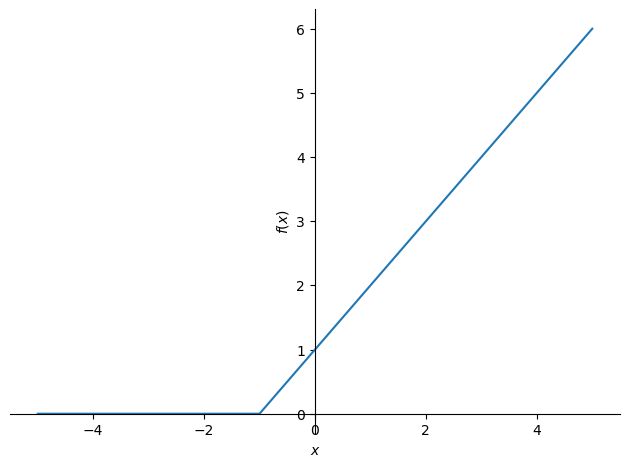

In [78]:
# plot logistic function
plot(f, (x, -5, 5))

In [79]:
# evaluate logistic function at x = 0
print(f.subs(x, 0))
print(f.series(x, 0, 4).removeO().subs(x, 0))

1
1


1 1 + O(x)
2 x + 1
3 x + 1
4 x + 1
5 x + 1
6 x + 1
7 x + 1


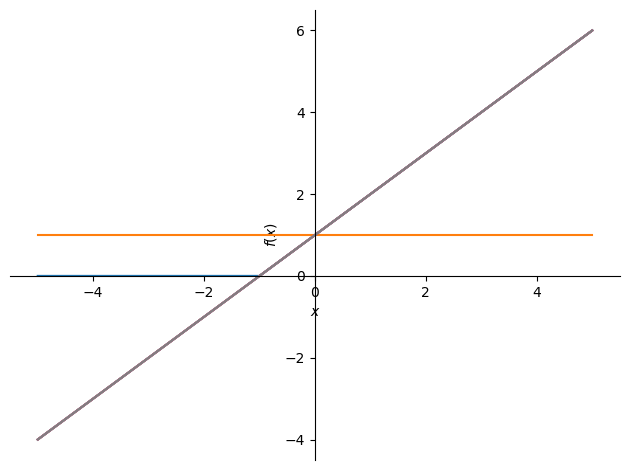

In [80]:
# compute multiple taylor series of logistic function and plot them in one graph
p = plot(f, (x, -5, 5), show=False)

for i in range(1, 8):
    taylor = f.series(x, 0, i)
    print(i, taylor)
    p.extend(plot(taylor.removeO(), (x, -5, 5), show=False, line_style='-'))
p.show()

## Bernstein polynomial

In [98]:
bound = 5
a, b = -bound, bound

n = 100
c = [[f.subs(x, a+ (k/n)*(b-a)),] for k in range(n+1)]
bp = BPoly(c, [0, 1])

In [99]:
X = np.linspace(-1*bound, 1*bound, 100)
fig = go.Figure()

fig.add_trace(go.Scatter(x=X, y=bp((X-a) / (b-a)), name=f'BPoly({n})'))
fig.add_trace(go.Scatter(x=X, y=np.array([f.subs(x, x_) for x_ in X], dtype=np.float64), name='f(x)'))
# add rectangle for the interval between a and b
fig.add_shape(type='rect', x0=a, y0=0, x1=b, y1=float(f.subs(x, b)), line=dict(color='RoyalBlue'), fillcolor='LightSkyBlue', opacity=0.3)
fig.show()